# Calculate Jensen-Shannon Divergence Between Luke and John

The KL Divergence between two discrete distributions $P$ and $Q$ with pdfs $p$ and $q$, defined over the same sample space $X=\{x_0,x_1, \dots, x_N\}$, is given by

\begin{equation}
KL(P||Q) = \sum_{i=0}^N p(x_i) \ln \Big( \frac{p(x_i)}{q(x_i)} \Big)
\end{equation}

This divergence is not a metric because it is not symmetric, i.e. it is often the case that $KL(P||Q) \ne KL(Q||P)$. To address this, we will use the Jensen-Shannon Divergence which is a true metric and is defined as

\begin{equation}
JSD(P||Q) = \frac{1}{2}KL(P||R) + \frac{1}{2}KL(Q||R)
\end{equation}

where $R$ is defined as the average of the two distributions $R=\frac{P+Q}{2}$

---

In [2]:
from PIL import Image
import numpy as np

In [3]:
luke = Image.open("/home/nathan/Downloads/Luke_Van_Poppering.jpeg")
luke.thumbnail((300,300)) # Thanks for this, John....
john = Image.open("/home/nathan/Downloads/John_Abascal.jpg")
john.thumbnail((300,300))

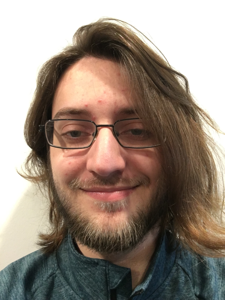

In [4]:
luke

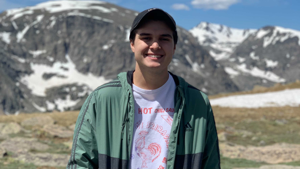

In [5]:
john

---
If we assume that our histograms are exact, then we can trivally calculate the Jensen-Shannon Divergence between them by normalizing the histograms and summing up the terms on the RHS of the JSD equation...

In [17]:
def KL(p: np.array, q: np.array):
    val = 0
    for i,pi in enumerate(p):
        if pi == 0:
            continue
        val += pi*np.log2(pi/q[i])
    return val

def JSD(p: np.array, q: np.array):
    r = (p+q)/2
    p = p[r != 0] # If r_i is zero, then it is in neither p nor q and can be ignored
    q = q[r != 0]
    r = r[r != 0] 
    val = 0.5*(KL(p,r)+KL(q,r))
    return val

def hist_loss(im1, im2):
    im1_channels = im1.split()
    im2_channels = im2.split()
    loss = []
    for im1_c, im2_c in zip(im1_channels,im2_channels):
        hist1 = np.array(im1_c.histogram())
        hist2 = np.array(im2_c.histogram())
        loss.append(JSD(hist1/hist1.sum(), hist2/hist2.sum()))
    return np.mean(loss)

---
It is symmetric...

In [18]:
hist_loss(luke, john) == hist_loss(john, luke)

True

and returns zero when operating on the same image...

In [19]:
hist_loss(john, john)

0.0

In [20]:
hist_loss(luke, luke)

0.0

In [21]:
hist_loss(np.zeros(255),np.ones(255))

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [25]:
JSD(np.zeros(255),np.ones(255)/255)

0.49999999999999845